In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

In [2]:
def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)

# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

In [3]:
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

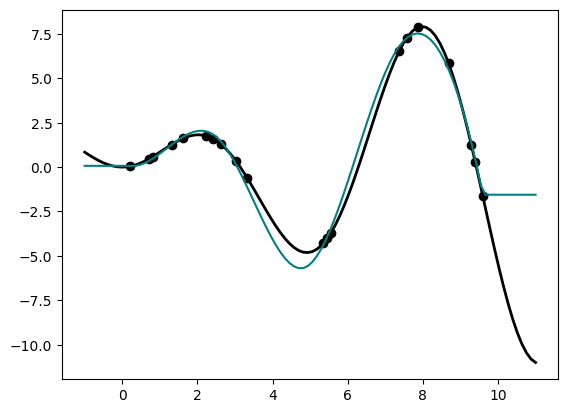

In [4]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

model = make_pipeline(SplineTransformer(), Ridge(alpha=1e-3))
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)

ax.plot(x_plot, y_plot, label="B-spline")

plt.show()

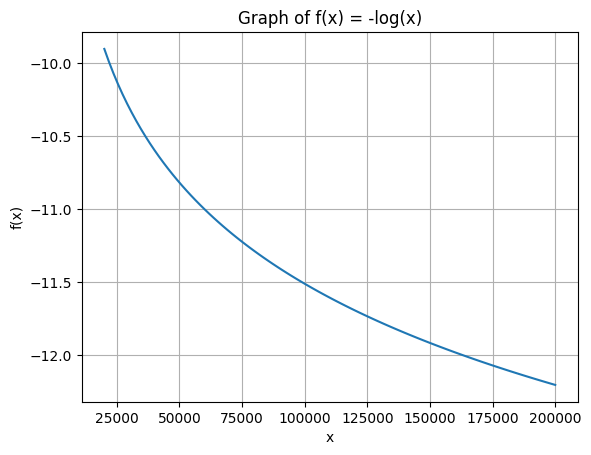

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -np.log(x)

# Define the range of x values
x_values = np.linspace(200000, 20000, 100)  # 100 points between 200000 and 20000

# Compute the corresponding y values
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = -log(x)')
plt.grid(True)
plt.show()


In [6]:
import numpy as np

def log_function(x):
    if x <= 1:
        return 200000
    elif 1 < x <= 1.5:
        return 20000 * np.log(1.5) / np.log(x)
    elif 1.5 < x <= 2:
        return 10000 * np.log(2) / np.log(x)
    else:
        return None

# Example usage:
print(log_function(1))    # Output: 200000
print(log_function(1.5))  # Output: Approximately 63326.23
print(log_function(1.8))  # Output: Approximately 17677.18
print(log_function(2))    # Output: 10000
print(log_function(2.5))  # Output: None (since it's outside the defined range)

200000
20000.0
11792.495848393759
10000.0
None


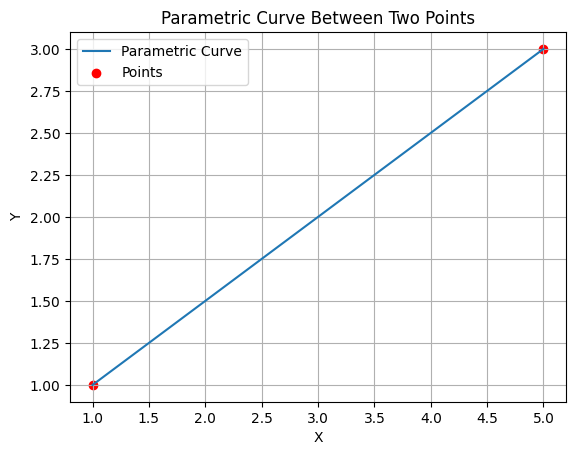

In [7]:
def parametric_curve(t, p0, p1):
    return (1 - t) * p0 + t * p1

# Define the points
point1 = np.array([1, 1])  # Example point 1
point2 = np.array([5, 3])  # Example point 2

# Generate values for the parameter t
t_values = np.linspace(0, 1, 100)

# Generate x and y values for the parametric curve using linear interpolation
x_values = parametric_curve(t_values, point1[0], point2[0])
y_values = parametric_curve(t_values, point1[1], point2[1])

# Plot the parametric curve
plt.plot(x_values, y_values, label='Parametric Curve')
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='red', label='Points')
plt.title('Parametric Curve Between Two Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

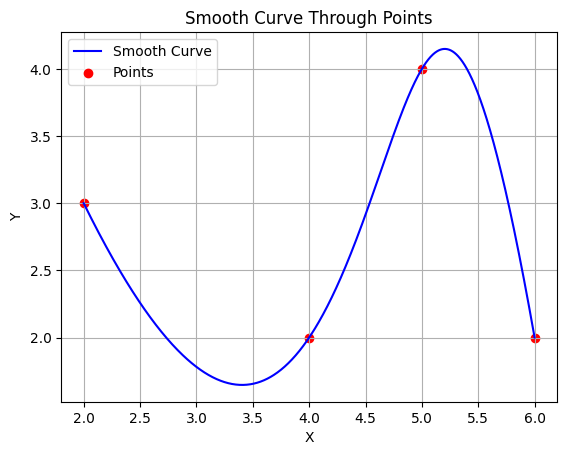

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splprep

# Define the points
points = np.array([ [2, 3], [4, 2], [5, 4], [6, 2]])

# Perform spline interpolation,
tck, u = splprep(points.T, s=0)
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck)

# Plot the interpolated curve
plt.plot(x_new, y_new, label='Smooth Curve', color='blue')
plt.scatter(points[:, 0], points[:, 1], color='red', label='Points')
plt.title('Smooth Curve Through Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
from scipy.optimize import fsolve

def equations(vars):
    a, b = vars
    eq1 = -a * np.arctan(-0.5) + b - 30
    eq2 = -a * np.arctan(0.5) + b - 70
    return [eq1, eq2]

# Solve the equations to find a and b
a, b = fsolve(equations, (1, 1))


print('a, b: ', a, b )
# Define the function f(x)
def f(x):
    return a * np.arctan(x - 0.5) + b

# Test the function
print("f(0) =", f(0))  # Output should be approximately 30
print("f(1) =", f(1))  # Output should be approximately 70


a, b:  -43.1362086458322 50.0
f(0) = 70.0
f(1) = 30.0
